In [2]:
import pandas as pd
import os
os.chdir(r'/Users/manick/Python Training/dataset')

In [3]:
infile = pd.read_csv('mtcars.csv')
infile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
CarName    32 non-null object
mpg        32 non-null float64
cyl        32 non-null int64
disp       32 non-null float64
hp         32 non-null int64
drat       32 non-null float64
wt         32 non-null float64
qsec       32 non-null float64
vs         32 non-null int64
am         32 non-null int64
gear       32 non-null int64
carb       32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [4]:
#infile['hp'].value_counts()

In [5]:
df1 = infile.loc[ : , ['mpg','disp'] ]
#df1.head(5)
df1.corr()

,mpg,disp
mpg,1.000000,-0.847551
disp,-0.847551,1.000000


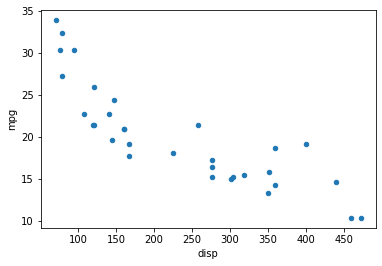

In [6]:
%matplotlib inline
infile.plot.scatter('disp','mpg')

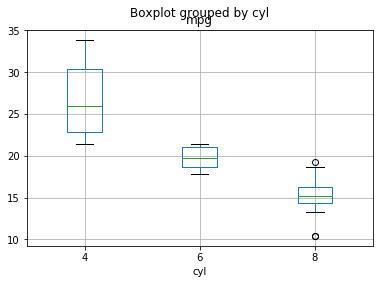

In [7]:
infile.boxplot('mpg',by='cyl')

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
x = infile.loc[ : , ['wt','cyl','hp','drat','am','vs',
                    'disp','carb','qsec','gear']]
y = infile['mpg']
linmod1 = LinearRegression()

linmod1.fit(x, y)   # train the model
print(linmod1.intercept_, linmod1.coef_)

12.303374155996298 [-3.71530393 -0.11144048 -0.02148212  0.78711097  2.52022689  0.31776281
  0.01333524 -0.19941925  0.82104075  0.65541302]


In [10]:
from sklearn.metrics import r2_score, mean_squared_error
predmpg = linmod1.predict(x)

mse = mean_squared_error(y,predmpg)
r2  = r2_score(y,predmpg)

n = len(y)    # Number of Samples
p = x.shape[1] # Number of Input variables
adjr2 = 1 - (1-r2)*(n-1)/ (n-p-1)
print(r2,adjr2,mse)

### multi collinearity 


0.8690157644777646 0.8066423189909859 4.609200938020334


In [11]:
from sklearn.feature_selection import RFE
x1 = infile.drop(columns=['mpg','CarName'])
y1 = infile['mpg'] 

linmod2 = LinearRegression()
rfemod = RFE(linmod2,1)
rfemod.fit(x1,y1)
rfemod.ranking_
x1.columns

varlist = x1.columns
rating = rfemod.ranking_
pd.DataFrame([varlist,rating])

,0,1,2,3,4,5,6,7,8,9
0,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
1,8,10,9,4,1,3,7,2,6,5


In [12]:
x = infile.loc[:,['wt','am','qsec']] # <--Add variables here1,2,3...x
y = infile['mpg']
linmod3 = LinearRegression()
linmod3.fit(x,y)
predmpg = linmod3.predict(x)
r2 = r2_score(y, predmpg)

n = len(y)    # Number of Samples
p = x.shape[1] # Number of Input variables
adjr2 = 1 - (1-r2)*(n-1)/ (n-p-1)
print(r2,adjr2)

0.8496635563617072 0.8335560802576044


In [13]:
print(linmod3.intercept_, linmod3.coef_)

9.617780514561636 [-3.91650372  2.93583719  1.22588597]


y = a + b1x1 + b2x2 + b3x3 ....)
mpg = 9.67 + -3.9*wt +2.9*am + 1.22*qsec